In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
%pip install caer

In [ ]:
%pip install canaro

In [4]:
%pip install sierra

In [5]:
%pip install caer canaro

In [6]:
import os
import gc
import numpy as np
import pandas as pd
import cv2 as cv
import caer 
import canaro

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [7]:
img_size = (80,80)
channels = 1
char_path = r"../input/the-simpsons-characters-dataset/simpsons_dataset"

In [8]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))
    
char_dict = caer.sort_dict(char_dict, descending = True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [9]:
characters = []
ctr = 0
for i in char_dict:
    characters.append(i[0])
    ctr += 1
    if(ctr>=10):
        break
        
for i, char in enumerate(characters):
    print(f"{i} : {char}")

0 : homer_simpson
1 : ned_flanders
2 : moe_szyslak
3 : lisa_simpson
4 : bart_simpson
5 : marge_simpson
6 : krusty_the_clown
7 : principal_skinner
8 : charles_montgomery_burns
9 : milhouse_van_houten


In [10]:
#create training data
train = caer.preprocess_from_dir(char_path, characters, channels = channels, IMG_SIZE = img_size, isShuffle = True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.5244081020355225s
[INFO] At 1000 files
[INFO] 1454 files found in 0.15527701377868652s
[INFO] At 1000 files
[INFO] 1452 files found in 0.16275715827941895s
[INFO] At 1000 files
[INFO] 1354 files found in 0.10123252868652344s
[INFO] At 1000 files
[INFO] 1342 files found in 0.09419083595275879s
[INFO] At 1000 files
[INFO] 1291 files found in 0.07331681251525879s
[INFO] At 1000 files
[INFO] 1206 files found in 0.03050374984741211s
[INFO] At 1000 files
[INFO] 1194 files found in 0.028459787368774414s
[INFO] At 1000 files
[INFO] 1193 files found in 0.030061721801757812s
[INFO] At 1000 files
[INFO] 1079 files found in 0.004311561584472656s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 1m 1s


In [11]:
len(train) #13811 images in train set(list of lists)

13811

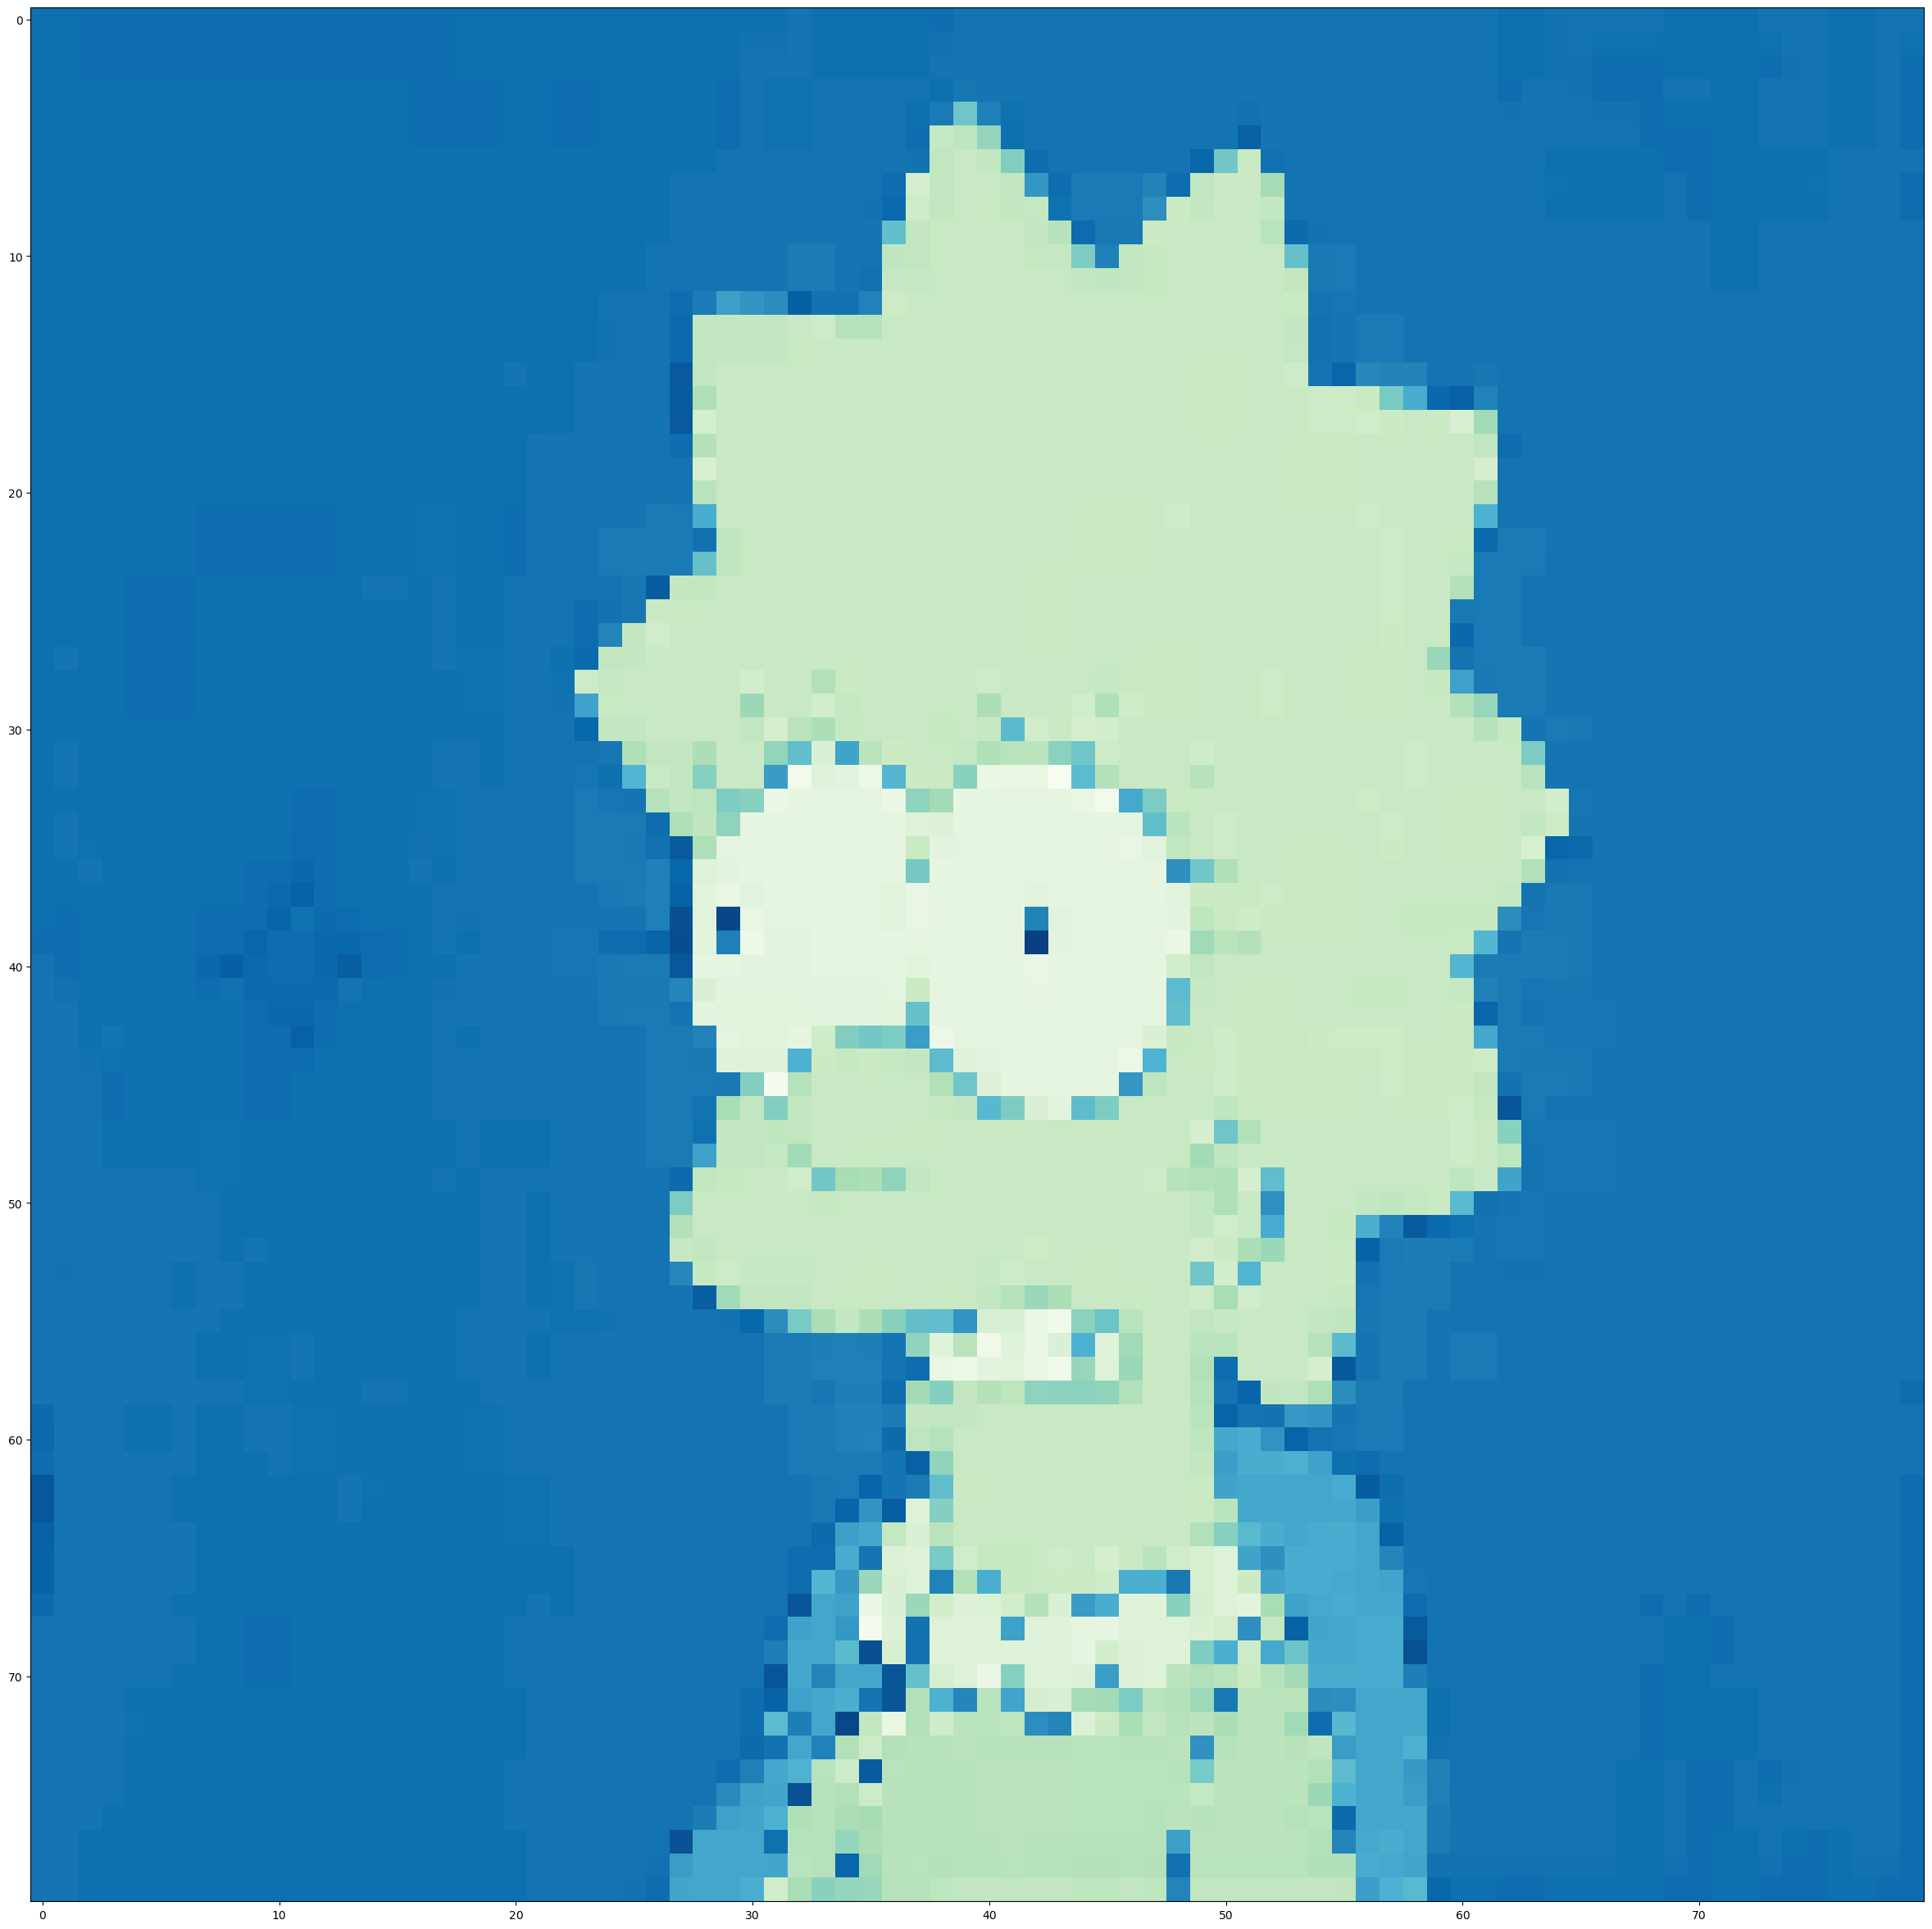

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (30,30))
plt.imshow(train[0][0], cmap="GnBu_r")
plt.show()

In [13]:
#splitting train set features and labels
ft_set,lb_set = caer.sep_train(train, IMG_SIZE = img_size)

In [14]:
from tensorflow.keras.utils import to_categorical
#normalize the features => (-1,1)
ft_Set = caer.normalize(ft_set)
lb_set = to_categorical(lb_set, len(characters))

In [15]:
x_train, x_val, y_train, y_val = caer.train_val_split(ft_set, lb_set, val_ratio = 0.2)

In [16]:
del train
del ft_set
del lb_set
gc.collect()

0

In [17]:
BATCH_SIZE = 32
EPOCHS = 10

In [20]:
#img data generator
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size = BATCH_SIZE)

In [ ]:
model = canaro.models.createSimpsonsModel(IMG_SIZE=img_size, channels=channels, output_dim=len(characters), loss='binary_crossentropy', decay=None, learning_rate=0.001, momentum=0.9, nesterov=True)

In [ ]:
model.summary()

In [29]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_lis = [LearningRateScheduler(canaro.lr_schedule)]

In [ ]:
training = model.fit(train_gen, steps_per_epoch = len(x_train)//BATCH_SIZE,epochs=EPOCHS, validation_data = (x_val,y_val), validation_steps = len(y_val)//BATCH_SIZE, callbacks = callbacks_list)

In [31]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [32]:
def prepare(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img = cv.resize(img,img_size)
    img = caer.reshape(img,img_size,1)
    return img

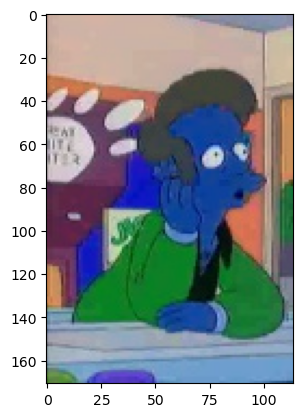

In [36]:
test_path = "/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/apu_nahasapeemapetilon_42.jpg"
img = cv.imread(test_path)
plt.imshow(img, cmap="PuBuGn_r")
plt.show()

In [ ]:
pred = model.predict(prepare(img))
pred

In [ ]:
print(characters[np.argmax(pred[0])])